# Week 11, Part 2

### Topic
 1. Fitting Hubble's law using Linear Regression
 1. Estimating the beginning of time using regression coefficients



In [1]:
# resize
require(repr)
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res=300)

Loading required package: repr



## 1. Fitting Hubble's law using Linear Regression

Let's read in the Hubble data:

In [2]:
hubble = read.csv('hubble.csv',stringsAsFactors=TRUE)

Let's do a bit of data formatting to translate from weird astronomy units (parsecs) to kilometers:

In [3]:
distance = hubble[,1]/1e6 # pc -> Mpc, PS: 1 pc = 30,856,776,000,000.00 km or ~30 trillion km, or 3.26 light years

Please note: parsecs is a unit of distance NOT time (sorry Star Wars).

Luckily for us, the velocity is in units that are understandable as km/s:

In [4]:
vel = hubble[,2] # km/s

Recall from lecture notes: looking at the *redshift* of the lights of galaxies $\rightarrow$ redder means receding further.

Questions:
 1. How linear is the relationship? (R)
 1. Fit a line
 1. Is our fit justified? (residuals, qqnorm)
 1. Are there any outliers we should worry about?


First things first, lets plot!

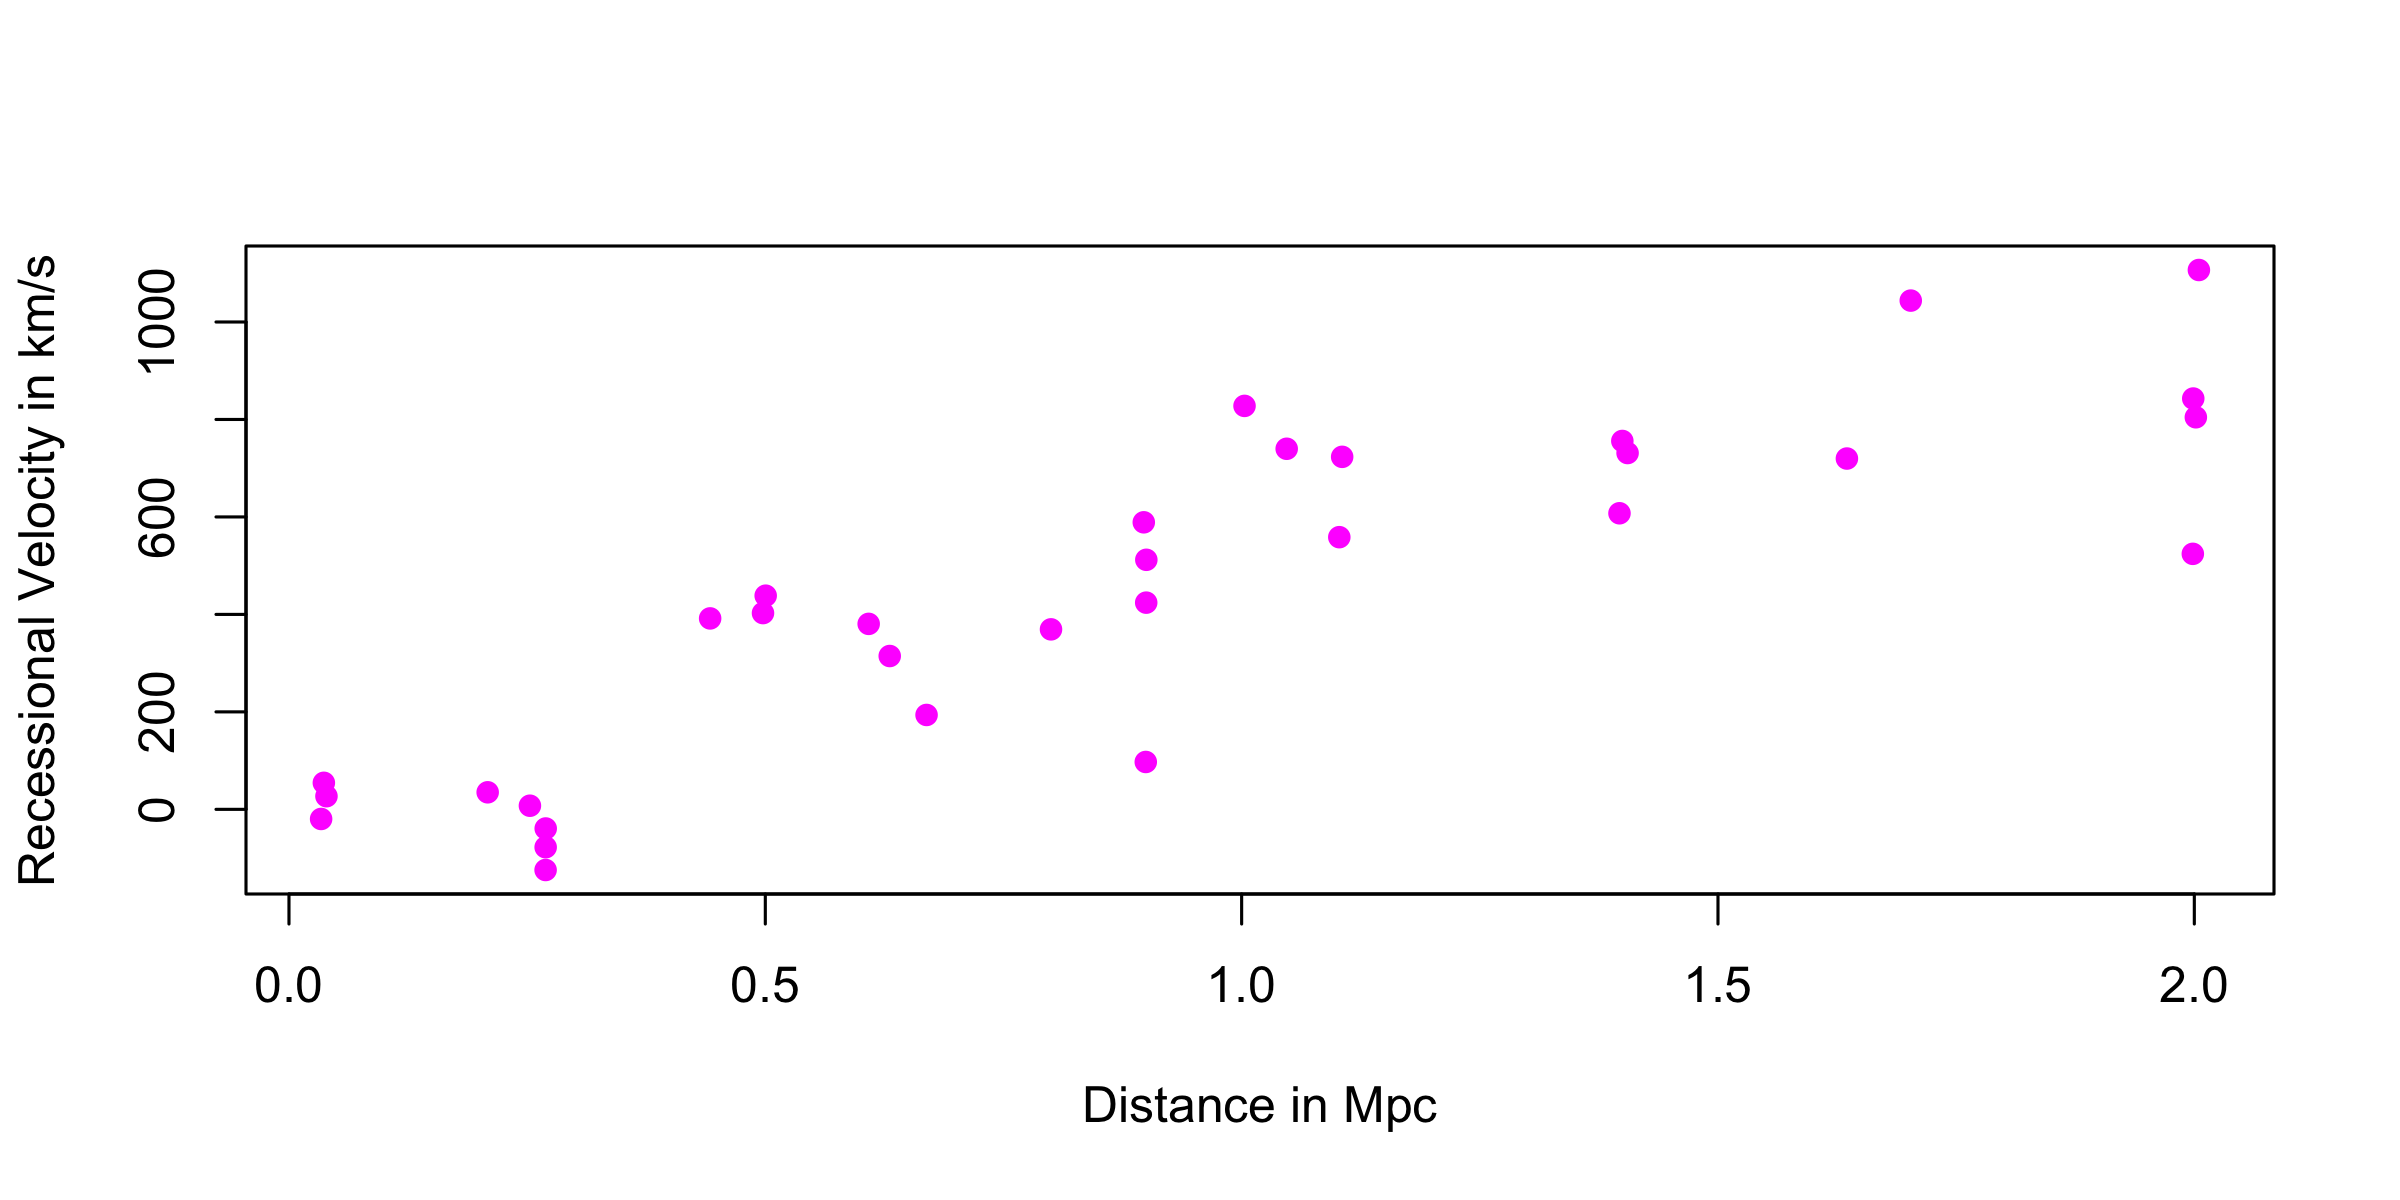

In [5]:
plot(distance, vel, pch=16, col=30, xlab='Distance in Mpc', ylab = 'Recessional Velocity in km/s')

Note: there are things that have velocities <0, which means they are moving towards us.

How linear is this thing?

In [6]:
R = cor(distance,vel)
print(R)

[1] 0.8602497


So, pretty linear.  Let's fit a line:

In [7]:
myLine = lm(formula = vel ~ distance, data = data.frame(distance,vel))

In [8]:
summary(myLine)


Call:
lm(formula = vel ~ distance, data = data.frame(distance, vel))

Residuals:
    Min      1Q  Median      3Q     Max 
-433.14 -115.74    5.34  148.64  344.34 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.976     56.232   0.106    0.916    
distance     476.091     51.519   9.241 2.78e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 178.3 on 30 degrees of freedom
Multiple R-squared:   0.74,	Adjusted R-squared:  0.7314 
F-statistic:  85.4 on 1 and 30 DF,  p-value: 2.782e-10


We can see that we have a very small p-value for our slope - so probably a line is a good fit!

Let's analyze our residuals:

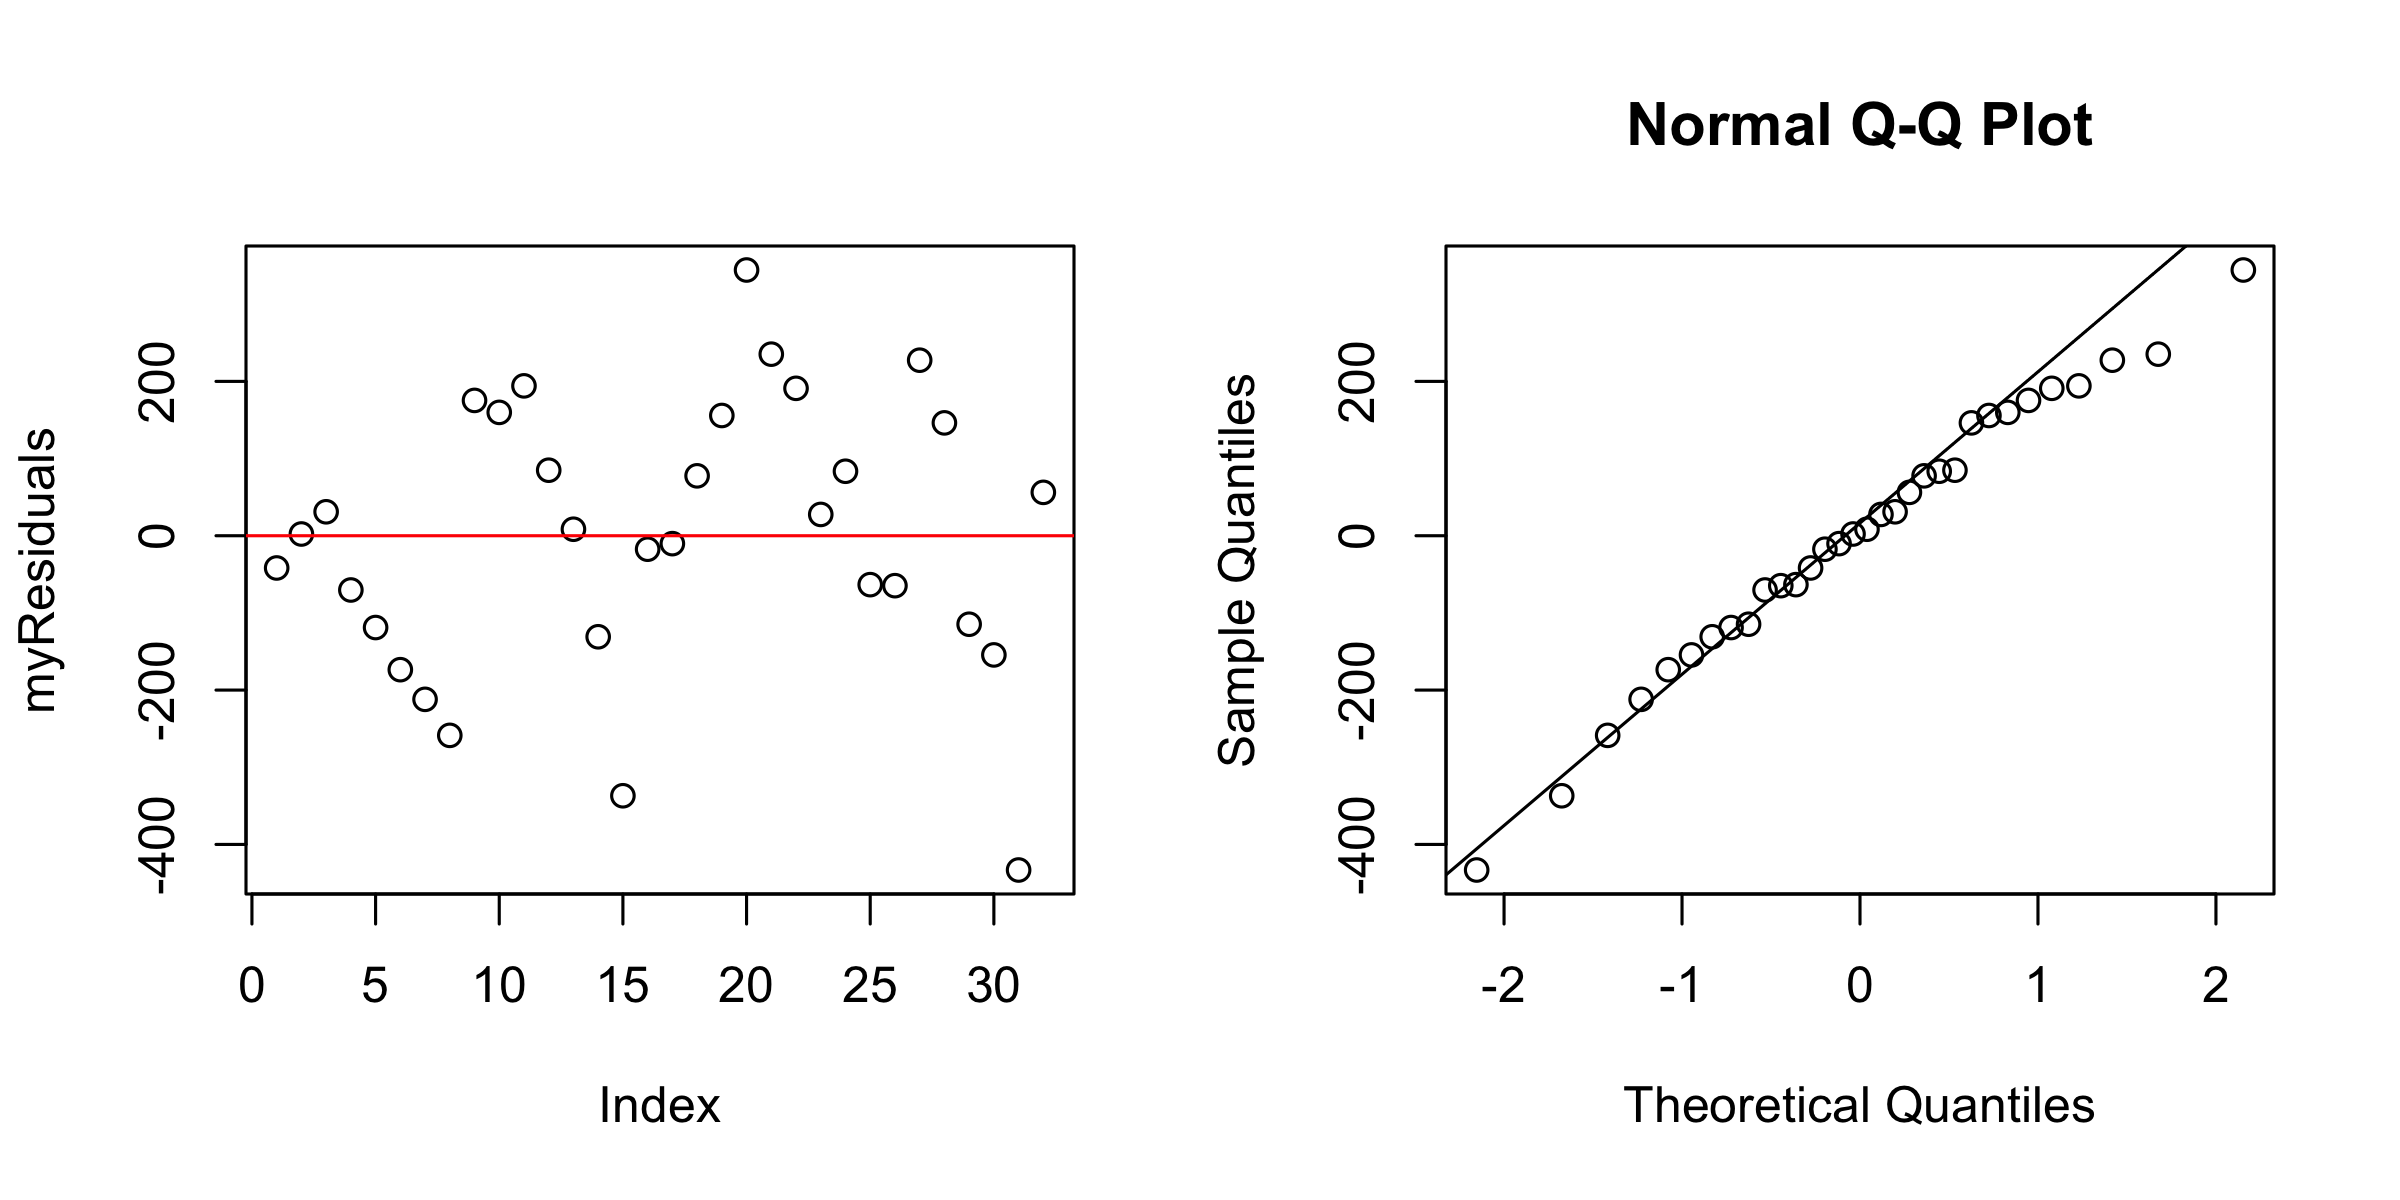

In [9]:
par(mfrow=c(1,2))
myResiduals = resid(myLine)
plot(myResiduals)
abline(h=0, col='red') # if perfect fit

# we can also check if our residuals are normal (one of our fit conditions)
qqnorm(myResiduals)
qqline(myResiduals)

While our residuals look pretty normal, we see that there are some variations these variations are actually "cosmic scatter" and its because there are groups of galaxies that are gravitationally interacting and changing the relation from a straight line.

Let's plot our data & fit, first by grabbing the coefficients of our fit:

In [10]:
b0 = myLine$coefficients[1] # intercept
b1 = myLine$coefficients[2] # slope

... and then using the same sorts of plots we used before for our BAC-Beers dataset:

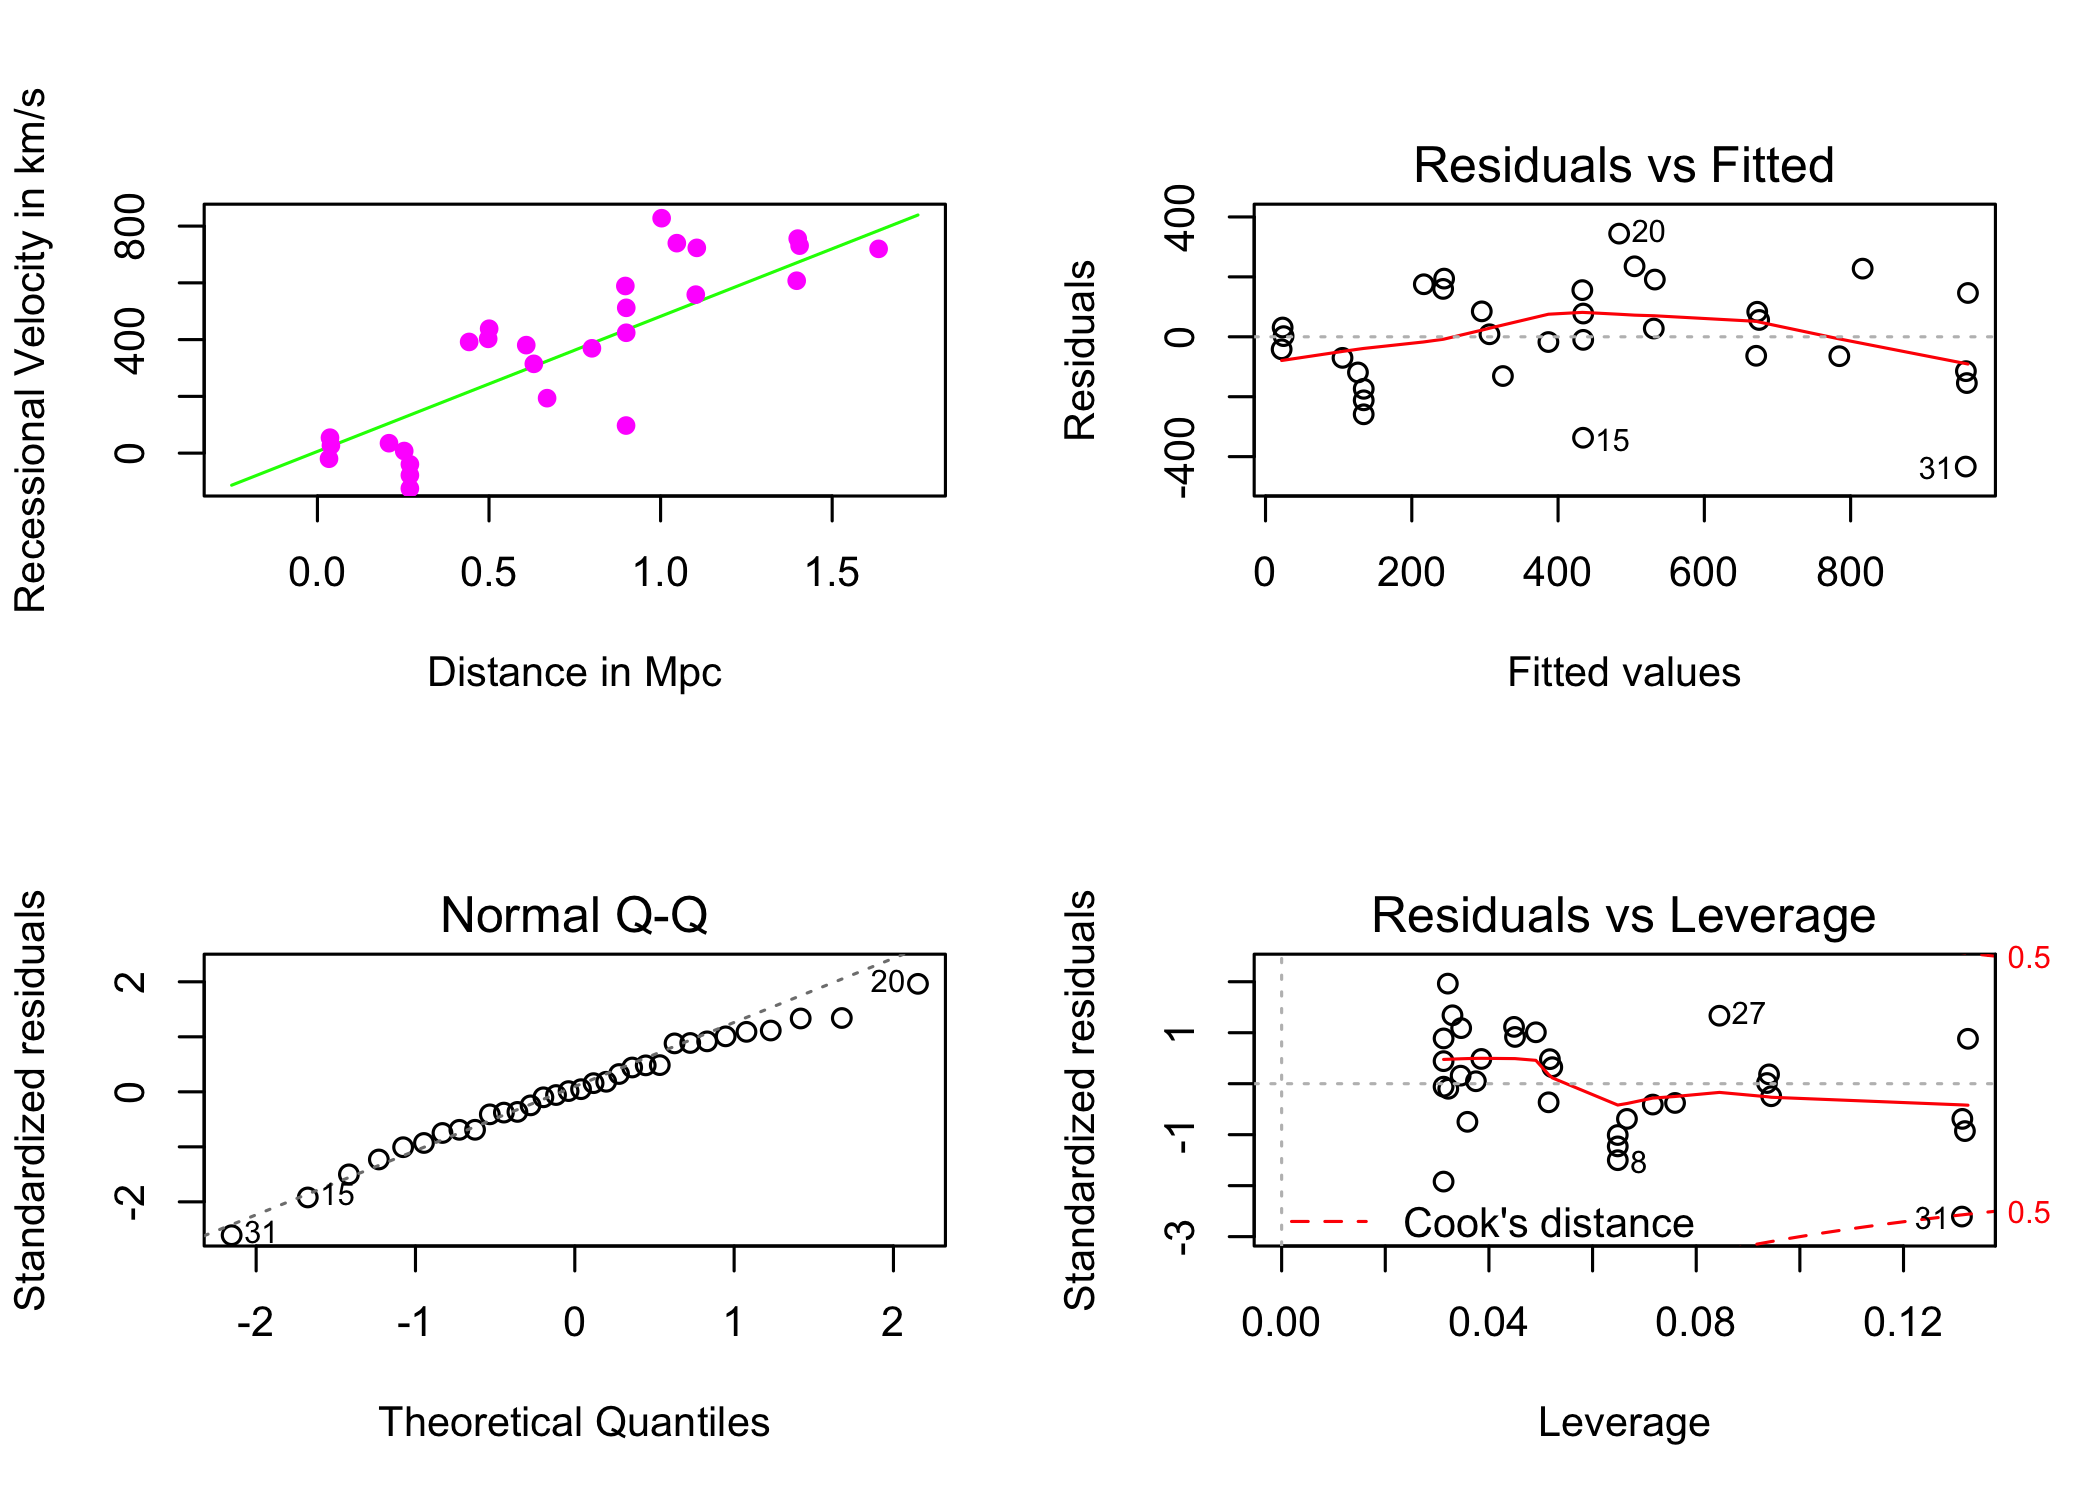

In [11]:
options(repr.plot.width=7, repr.plot.height=5)

par(mfrow=c(2,2))

x = seq(-0.25, 2.5) # little negative just so we can see the points
myNewLine = b0 + b1*x
plot(x, myNewLine, type='l', col="green", xlab="Distance in Mpc", ylab="Recessional Velocity in km/s")
points(distance, vel, pch=16, col=30) # over plot observation points
plot(myLine, which=1) # Residuals plot
plot(myLine, which=2) # qq-norm plot

# now, lets add another plot to our meagurie
plot(myLine, which=5) # residuals vs. leverage

## 2. Estimating the beginning of time using regression coefficients

Just for fun, let's use our linear fit's coefficients to calculate the beginning of time.

This brings us to hubbles law: $V = H_0 \times D$ where $H_0$ is a constant in units of velocity/Mpc = km/s/Mpc (weird) where $H_0$ is hubble's constant = b1, i.e. $H_0$ is just the slope of our linear fit!

In [12]:
hubbles_const = b1
print(unname(hubbles_const)) # in km/s/Mpc

[1] 476.0908


Note: actual value is like ~70 km/s/Mpc. But even though it's pretty off, it was a huge discovery!!

If we assume we are not in a special place in the universe, this means that the Universe is expanding away from itself you can think of for, example 2D universe represnted as a balloon and blowing up the balloon as the expanding universe you can draw some dots on the balloon and see that they expand away from eachother and the ones furthest from your mouth expand away from you fastest.

<img src="https://www.universetoday.com/wp-content/uploads/2015/02/Balloon-universe-expansion.jpg" width='600px'>

So, let's real quick, calculate the begining of time ok?

We recall that velocity = distance/time, so then time = distance/velocity we have a realationship for velocity and distance in the hubble constant which is the inverse of this!

In [13]:
beginning_of_time = 1.0/( unname(hubbles_const) * (1.0/3.08e19) ) 
# the last bit of numbers is just a unit conversion from Mpc to km

In [14]:
beginning_of_time

[1] 6.469354e+16

That is in seconds, so lets make it in years:

In [15]:
beginning_of_time_in_yrs = beginning_of_time/3.15e7 # into years
beginning_of_time_in_yrs

[1] 2053763272

This is still a large number, so let's finally transform it into Gyrs aka billions of years:

In [16]:
beginning_of_time_in_Gyrs = beginning_of_time/3.15e7/1e9 # into Gyears
beginning_of_time_in_Gyrs

[1] 2.053763

So, this says the Universe is ~2 Gyrs old. In realaity, here we have over estimated the hubble's constant so we are underestimating the age of the universe, which is actually about 13.5 Gyrs (or 13.5 billion years) old.

But in general, good job everybody!  With linear regression you just figured out (approximately) when the beginning of time was!  Hurray!!  Nobel prizes for everybody :D